# **Insurance Claims Prediction**
**Project Plan for Insurance Claims Prediction**

[Dataset](https://www.kaggle.com/datasets/litvinenko630/insurance-claims)

## **1. Understanding the Data and Business Objective**

- **Familiarize with the Dataset**
    - Review the data dictionary to understand each feature.
    - Identify data types (numerical, categorical, binary).
    - Understand the target variable `claim_status`.
- **Define the Business Problem**
    - Objective: Predict the likelihood of a policyholder making an insurance claim.
    - Importance: Improve risk assessment, pricing strategies, and fraud detection.


In [2]:
import pandas as pd
DATA_PATH = '../data/'
# Load the dataset
FILE_PATH = f"{DATA_PATH}/raw/Insurance claims data.csv"
insurance_data = pd.read_csv(FILE_PATH)
insurance_data

policy_id  subscription_length  vehicle_age  customer_age region_code  \
0      POL045360                  9.3          1.2            41          C8   
1      POL016745                  8.2          1.8            35          C2   
2      POL007194                  9.5          0.2            44          C8   
3      POL018146                  5.2          0.4            44         C10   
4      POL049011                 10.1          1.0            56         C13   
...          ...                  ...          ...           ...         ...   
58587  POL019269                 10.6          2.6            48          C5   
58588  POL001254                  2.3          2.2            37          C3   
58589  POL019859                  6.6          2.2            35          C8   
58590  POL014061                  4.1          3.6            44          C8   
58591  POL054184                  3.1          0.4            49         C12   

       region_density segment model fuel_type     max_torque  ...  \
0                8794      C2    M4    Diesel  250Nm@2750rpm  ...   
1               27003      C1    M9    Diesel  200Nm@1750rpm  ...   
2                8794      C2    M4    Diesel  250Nm@2750rpm  ...   
3               73430       A    M1       CNG   60Nm@3500rpm  ...   
4                5410      B2    M5    Diesel  200Nm@3000rpm  ...   
...               ...     ...   ...       ...            ...  ...   
58587           34738      B2    M6    Petrol  113Nm@4400rpm  ...   
58588            4076      C2    M4    Diesel  250Nm@2750rpm  ...   
58589            8794      B2    M6    Petrol  113Nm@4400rpm  ...   
58590            8794      B2    M6    Petrol  113Nm@4400rpm  ...   
58591           34791      B2    M6    Petrol  113Nm@4400rpm  ...   

      is_brake_assist is_power_door_locks  is_central_locking  \
0                 Yes                 Yes                 Yes   
1                  No                 Yes                 Yes   
2                 Yes                 Yes                 Yes   
3                  No                  No                  No   
4                  No                 Yes                 Yes   
...               ...                 ...                 ...   
58587             Yes                 Yes                 Yes   
58588             Yes                 Yes                 Yes   
58589             Yes                 Yes                 Yes   
58590             Yes                 Yes                 Yes   
58591             Yes                 Yes                 Yes   

      is_power_steering is_driver_seat_height_adjustable  \
0                   Yes                              Yes   
1                   Yes                              Yes   
2                   Yes                              Yes   
3                   Yes                               No   
4                   Yes                               No   
...                 ...                              ...   
58587               Yes                              Yes   
58588               Yes                              Yes   
58589               Yes                              Yes   
58590               Yes                              Yes   
58591               Yes                              Yes   

      is_day_night_rear_view_mirror is_ecw is_speed_alert ncap_rating  \
0                                No    Yes            Yes           3   
1                               Yes    Yes            Yes           4   
2                                No    Yes            Yes           3   
3                                No     No            Yes           0   
4                                No    Yes            Yes           5   
...                             ...    ...            ...         ...   
58587                           Yes    Yes            Yes           2   
58588                            No    Yes            Yes           3   
58589                           Yes    Yes            Yes 

In [3]:
# Display basic information about the dataset
insurance_data_info = insurance_data.info()
insurance_data_head = insurance_data.head()
insurance_data.describe()

insurance_data_info, insurance_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

(None,
    policy_id  subscription_length  vehicle_age  customer_age region_code  \
 0  POL045360                  9.3          1.2            41          C8   
 1  POL016745                  8.2          1.8            35          C2   
 2  POL007194                  9.5          0.2            44          C8   
 3  POL018146                  5.2          0.4            44         C10   
 4  POL049011                 10.1          1.0            56         C13   
 
    region_density segment model fuel_type     max_torque  ... is_brake_assist  \
 0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
 1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
 2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
 3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
 4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   
 
   is_power_door_locks  is_central_


#### **1.1 Data Familiarization**

- The dataset consists of 41 columns and 58,592 records.
- The target variable for prediction is `claim_status`, which indicates if a claim was made (1) or not (0).
- Key feature categories include:
    - **Policy Information**: `policy_id`, `subscription_length`
    - **Customer Information**: `customer_age`, `region_code`, `region_density`
    - **Vehicle Characteristics**: `vehicle_age`, `model`, `fuel_type`, `max_torque`, `max_power`, `engine_type`
    - **Safety and Features**: Binary indicators like `is_esc`, `is_tpms`, `is_parking_sensors`
    - **Specifications**: `displacement`, `cylinder`, `length`, `width`, `gross_weight`
    - **Safety Ratings**: `ncap_rating`

#### **1.2 Data Types**

- **Numerical Features**: `subscription_length`, `vehicle_age`, `customer_age`, `turning_radius`, `displacement`, `cylinder`, `length`, `width`, `gross_weight`, `ncap_rating`.
- **Categorical Features**: `policy_id`, `region_code`, `segment`, `model`, `fuel_type`, `engine_type`, `rear_brakes_type`, `transmission_type`, `steering_type`.
- **Binary Indicators**: Columns starting with `is_`, indicating `Yes` or `No`.

#### **1.3 Business Objective**

- **Objective**: Predict whether a policyholder will file an insurance claim.
- **Importance**: Accurate claim prediction helps in risk assessment, policy pricing, and identifying potential fraud cases.

## **2. Exploratory Data Analysis (EDA)**

- **Data Overview**
    - **Descriptive Statistics**
        - Calculate mean, median, mode, standard deviation for numerical features.
        - Analyze frequency counts for categorical features.
    - **Data Types and Structure**
        - Ensure correct data types (e.g., integers, floats, categories).
        - Check for unique values in identifiers like `policy_id`.
    - **Missing Values**
        - Identify missing or null values in each feature.
    - **Class Distribution**
        - Assess the imbalance in `claim_status`.
- **Visualization**
    - **Univariate Analysis**
        - Histograms and density plots for numerical features.
        - Bar plots for categorical features.
    - **Bivariate Analysis**
        - Box plots of numerical features against `claim_status`.
        - Mosaic plots for categorical features against `claim_status`.
    - **Correlation Matrix**
        - Compute Pearson/Spearman correlation coefficients.
        - Identify multicollinearity among features.
    - **Class Imbalance Visualization**
        - Pie chart or bar plot showing the proportion of classes in `claim_status`.

In [4]:
# Descriptive statistics for numerical features
descriptive_stats = insurance_data.describe()

# Check for unique values in `policy_id` to ensure it serves as an identifier
unique_policy_id_count = insurance_data['policy_id'].nunique()

# Check for missing values in the dataset
missing_values = insurance_data.isnull().sum()

# Class distribution for `claim_status`
class_distribution = insurance_data['claim_status'].value_counts(normalize=True)

(descriptive_stats, unique_policy_id_count, missing_values, class_distribution)


(       subscription_length   vehicle_age  customer_age  region_density  \
 count         58592.000000  58592.000000  58592.000000    58592.000000   
 mean              6.111688      1.388473     44.823935    18826.858667   
 std               4.142790      1.134413      6.935604    17660.174792   
 min               0.000000      0.000000     35.000000      290.000000   
 25%               2.100000      0.400000     39.000000     6112.000000   
 50%               5.700000      1.200000     44.000000     8794.000000   
 75%              10.400000      2.200000     49.000000    27003.000000   
 max              14.000000     20.000000     75.000000    73430.000000   
 
             airbags  displacement      cylinder  turning_radius        length  \
 count  58592.000000  58592.000000  58592.000000    58592.000000  58592.000000   
 mean       3.137066   1162.355851      3.626963        4.852893   3850.476891   
 std        1.832641    266.304786      0.483616        0.228061    311.45711

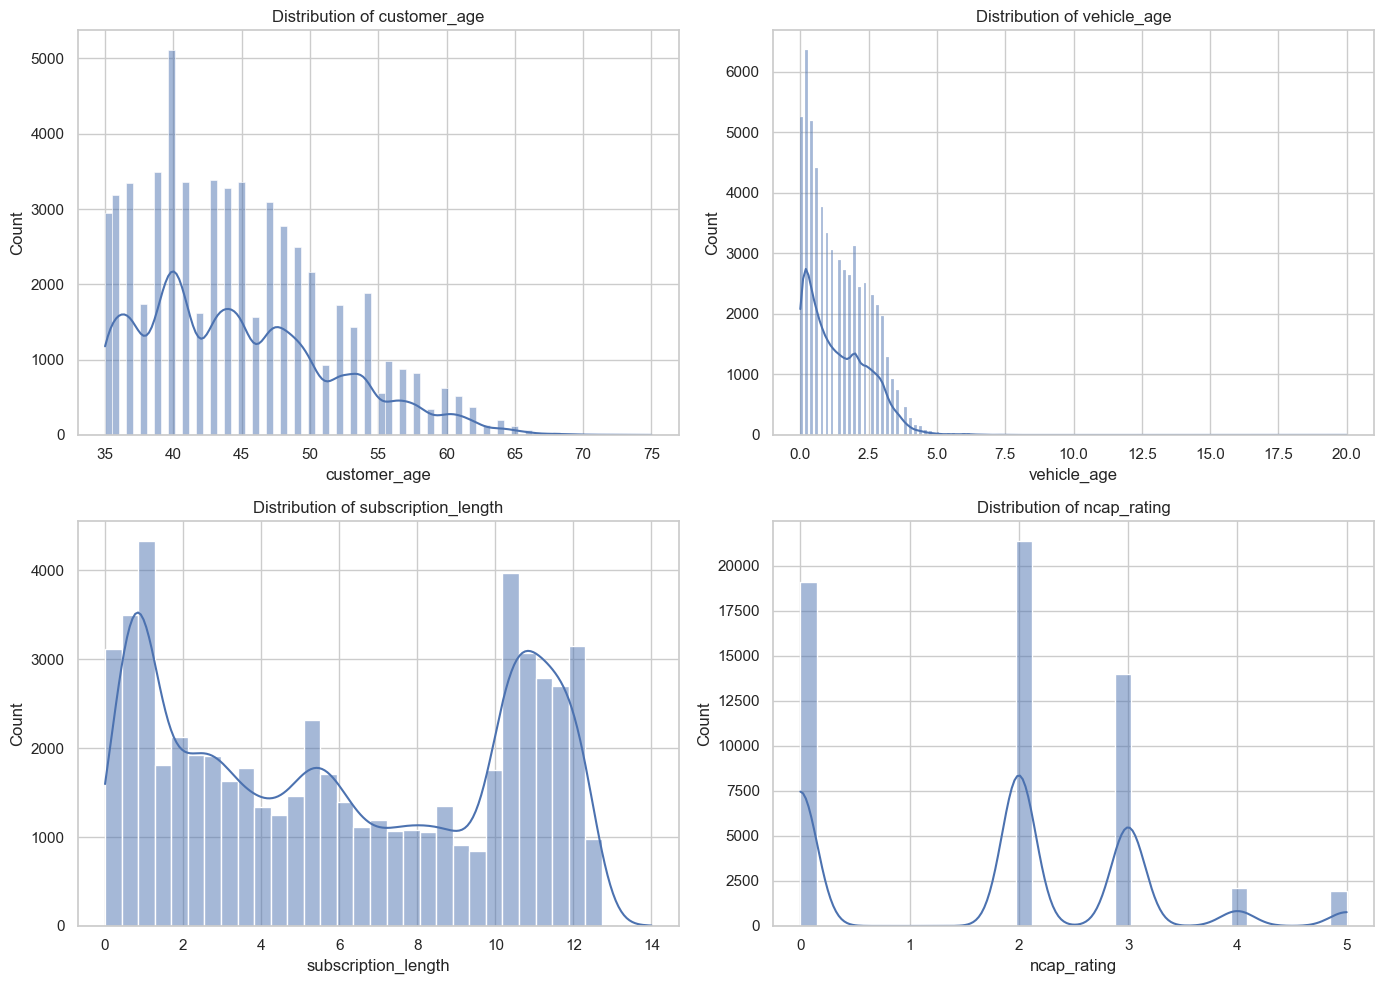

/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_19727/2942891025.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='claim_status', data=insurance_data, palette='viridis')


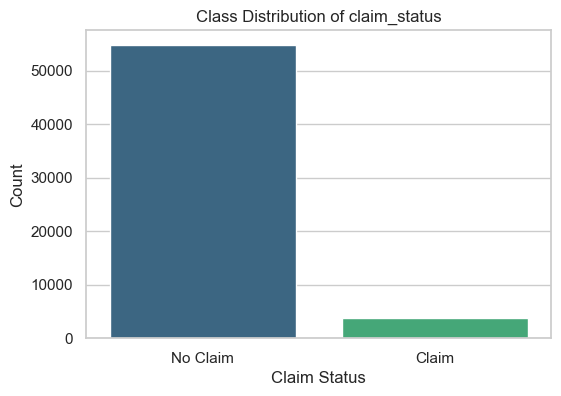

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure aesthetics
sns.set(style="whitegrid")

# Univariate Analysis: Histograms for numerical features
numerical_features = ['customer_age', 'vehicle_age', 'subscription_length', 'ncap_rating']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for feature, ax in zip(numerical_features, axes.flatten()):
    sns.histplot(insurance_data[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

# Class distribution bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='claim_status', data=insurance_data, palette='viridis')
plt.title('Class Distribution of claim_status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Claim', 'Claim'])
plt.show()


- **Univariate Distributions**:
    - `customer_age` has a right-skewed distribution centered around middle-aged policyholders.
    - `vehicle_age` mostly includes newer vehicles, but there are outliers with older vehicles.
    - `subscription_length` has a relatively uniform spread across different durations.
    - `ncap_rating` displays a distribution skewed towards lower safety ratings.
- **Class Distribution**:
    - The `claim_status` plot confirms the class imbalance, with the majority of instances being non-claims.

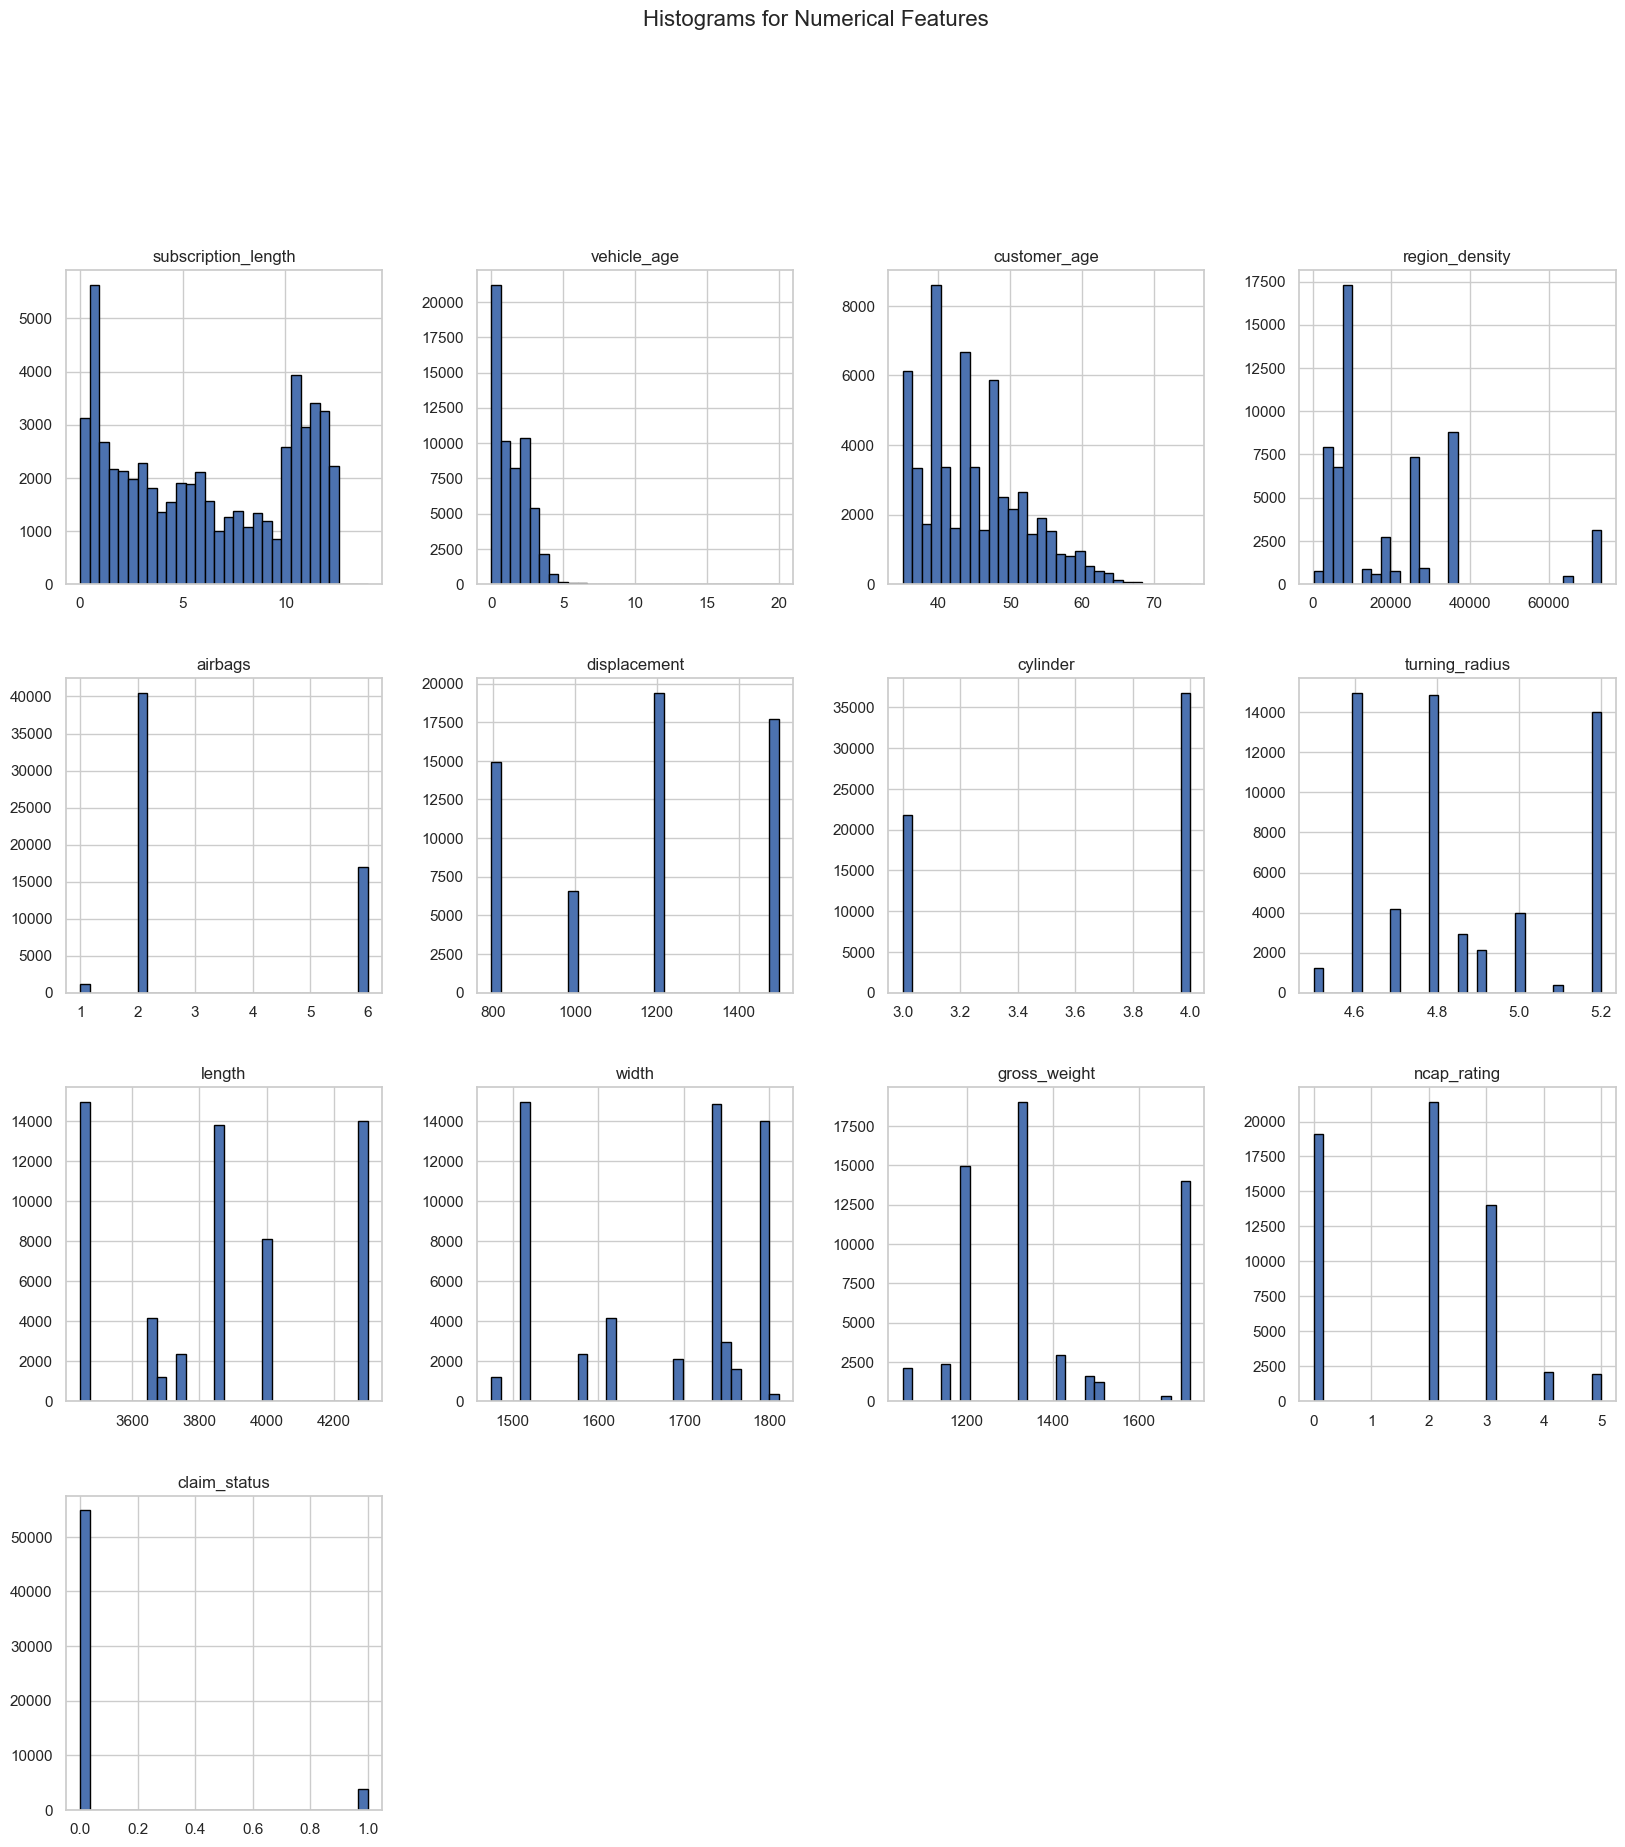

/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_19727/4067932349.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=insurance_data, ax=ax, palette='pastel')
/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_19727/4067932349.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=insurance_data, ax=ax, palette='pastel')
/var/folders/gz/4xss0gzj0qs3hyct0xxt8ycm0000gn/T/ipykernel_19727/4067932349.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=insurance_data, ax=ax, p

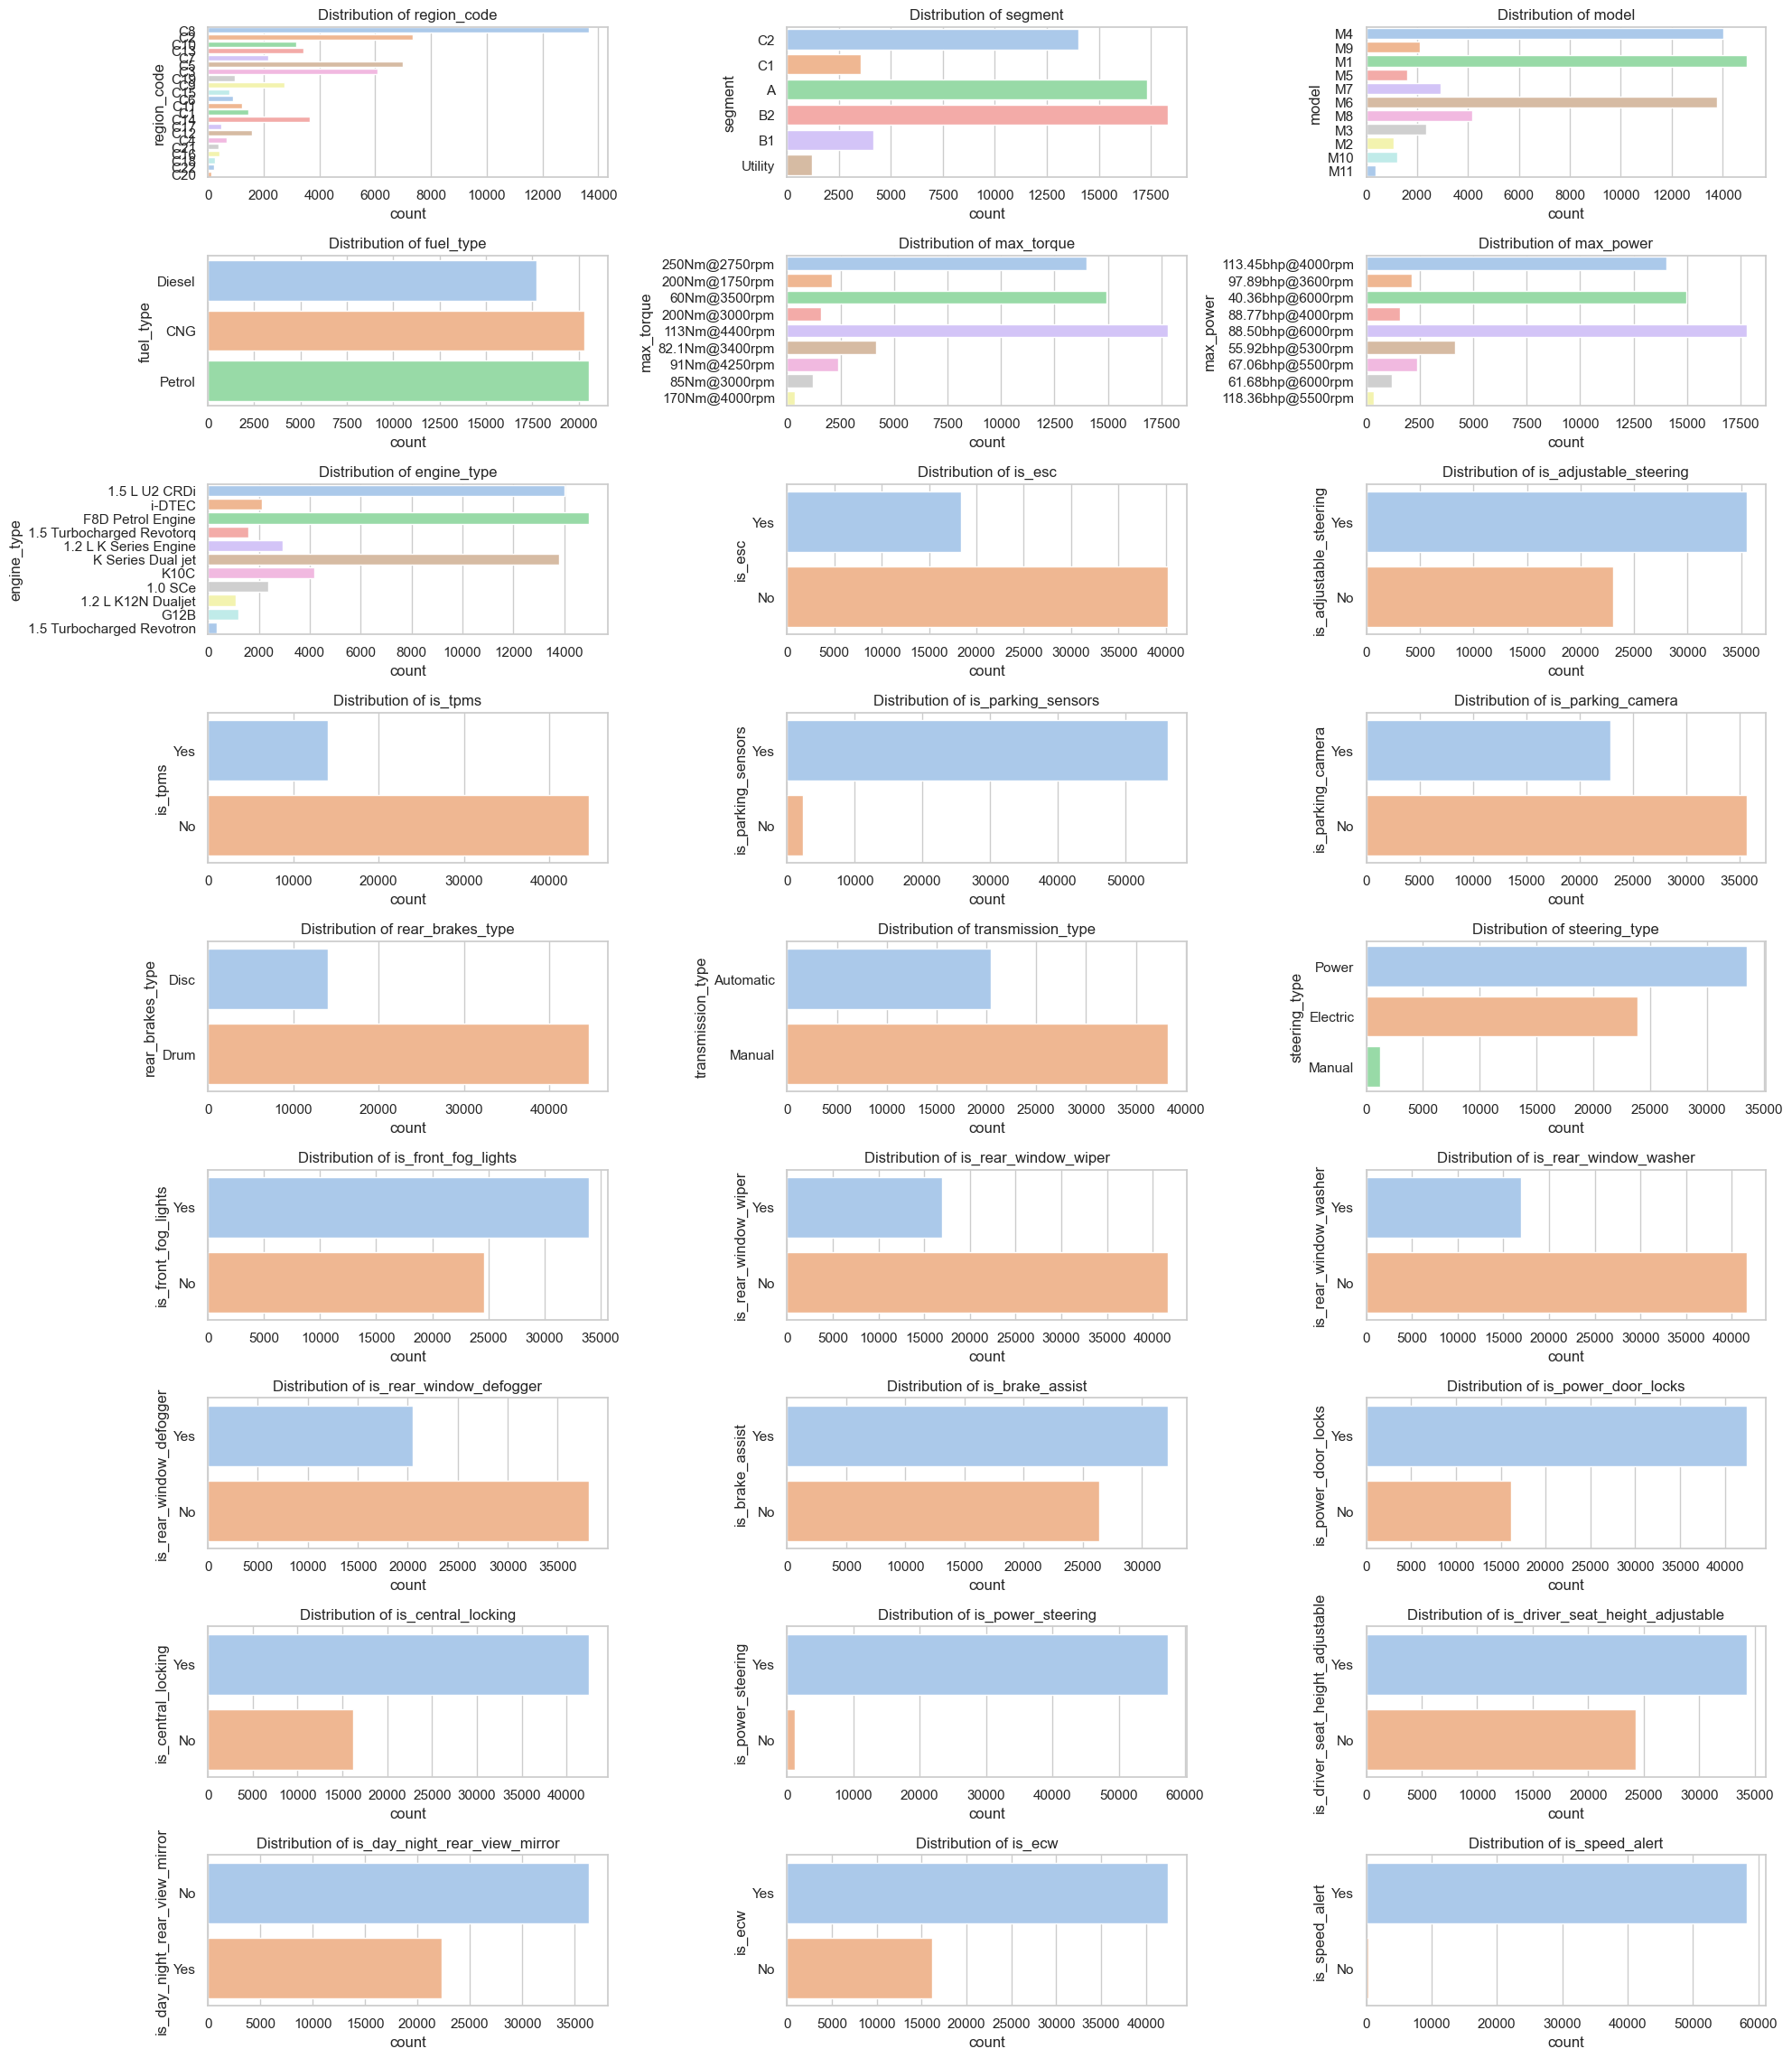

In [6]:
# Visualize the distributions for all columns that are suitable for histogram plotting
insurance_data.hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.suptitle('Histograms for Numerical Features', y=1.01, fontsize=16)
plt.show()

# For categorical columns, use bar plots to visualize their distributions
categorical_features = insurance_data.select_dtypes(include='object').columns.drop('policy_id')

# Create bar plots for categorical columns
fig, axes = plt.subplots(len(categorical_features) // 3 + 1, 3, figsize=(20, 25))
axes = axes.flatten()

for feature, ax in zip(categorical_features, axes):
    sns.countplot(y=feature, data=insurance_data, ax=ax, palette='pastel')
    ax.set_title(f'Distribution of {feature}')

# Remove unused subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### **Summary of EDA Findings**

### **1. Data Composition and General Observations**

- The dataset contains **58,592 records** with **41 features**, including numerical, categorical, and binary indicator columns.
- **No missing values** were detected, simplifying preprocessing.
- The target variable, `claim_status`, is highly **imbalanced**, with about **93.6%** of instances being non-claims and only **6.4%** representing claims. This imbalance will need to be addressed during model training to prevent bias toward the majority class.

### **2. Statistical Highlights**

- **Customer Age**: The age distribution is skewed towards middle-aged individuals, with a mean age of ~44.8 years. This could reflect a specific target demographic or customer base.
- **Vehicle Age**: Most vehicles are relatively new, with a mean age of ~1.39 years. This might suggest a focus on newer vehicle policies, but there are outliers with older cars that could be significant for claims prediction.
- **NCAP Ratings**: The safety ratings (`ncap_rating`) are skewed toward the lower end, which could imply a high prevalence of less-safe vehicles or policies for lower-rated vehicles.

### **3. Key Observations from Visualizations**

- **Numerical Feature Distributions**:
    - **Subscription Length**: Exhibits a wide spread, suggesting varied policy durations across policyholders.
    - **Turning Radius, Length, and Gross Weight**: These features show less variability, potentially indicating consistent vehicle characteristics within the policyholder group.
- **Class Imbalance**:
    - The visual confirmation of `claim_status` imbalance reinforces the need for strategies like resampling or class-weight adjustments during model training to ensure balanced learning.
- **Categorical Features**:
    - **Fuel Type and Model**: These categorical features have diverse distributions, hinting that certain vehicle models or fuel types may be more prone to claims.
    - **Region Code and Segment**: There are clear variances in policyholder distribution across regions and market segments, which may correlate with claim likelihood.

### **4. Bivariate Analysis**

- **Box Plots**:
    - Show distinct distributions for numerical features like `customer_age` and `vehicle_age` against `claim_status`, indicating potential relationships between these features and the target variable.
    - For instance, claims seem more associated with specific age ranges or vehicle characteristics, which can inform feature importance analyses later.

### **Key Takeaways**:

- The data shows **clear class imbalance**, which needs to be addressed in model training.
- Certain **numerical features**, such as `customer_age` and `vehicle_age`, have potential predictive power based on their distribution differences with respect to `claim_status`.
- **Categorical features** with high cardinality (e.g., `model`, `region_code`) will require encoding strategies that maintain their informative value without inflating the feature space.
- **Safety features** (e.g., `is_esc`, `ncap_rating`) could play a significant role in claim prediction due to their relationship with vehicle safety and accident likelihood.

## **3. Data Cleaning**

- **Handling Missing Values**
    - **Numerical Features**
        - Impute with mean, median, or use predictive imputation.
    - **Categorical Features**
        - Impute with mode or create a new category 'Unknown'.
    - **Drop Rows/Columns**
        - Consider dropping if a feature has excessive missing values.
- **Correcting Data Types**
    - Convert features to appropriate data types (e.g., `region_code` as categorical).
- **Outlier Detection and Treatment**
    - Use z-scores or IQR method to identify outliers in numerical features.
    - Decide whether to remove or cap outliers based on their impact.
- **Duplicate Records**
    - Check for and remove any duplicate entries based on `policy_id`.



In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assume 'insurance_data' is already loaded

# Split data into training, development, and test sets (70% train, 15% dev, 15% test)
train_data, temp_data = train_test_split(
    insurance_data,
    test_size=0.3,
    random_state=42,
    stratify=insurance_data['claim_status']
)
dev_data, test_data = train_test_split(
    temp_data,
    test_size=0.5,
    random_state=42,
    stratify=temp_data['claim_status']
)

# Separate features and target
X_train = train_data.drop(columns=['policy_id', 'claim_status'])
y_train = train_data['claim_status']
X_dev = dev_data.drop(columns=['policy_id', 'claim_status'])
y_dev = dev_data['claim_status']
X_test = test_data.drop(columns=['policy_id', 'claim_status'])
y_test = test_data['claim_status']

# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines for numerical and categorical data
numerical_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # Impute missing values with median
])

categorical_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute missing values with mode
])

# Combine numerical and categorical pipelines
preprocessor_imputer = ColumnTransformer(transformers=[
    ('num', numerical_imputer, numerical_features),
    ('cat', categorical_imputer, categorical_features)
], remainder='passthrough', verbose_feature_names_out=False)

# Fit and transform the training data; transform dev and test data
X_train_imputed = preprocessor_imputer.fit_transform(X_train)
X_dev_imputed = preprocessor_imputer.transform(X_dev)
X_test_imputed = preprocessor_imputer.transform(X_test)

all_feature_names = preprocessor_imputer.get_feature_names_out()

# Convert the transformed arrays back to DataFrames with appropriate column names and original indices
X_train_imputed = pd.DataFrame(X_train_imputed, columns=all_feature_names, index=X_train.index)
X_dev_imputed = pd.DataFrame(X_dev_imputed, columns=all_feature_names, index=X_dev.index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=all_feature_names, index=X_test.index)

# Check for duplicate records in the training set based on `policy_id`
duplicates_in_train = train_data.duplicated(subset=['policy_id']).sum()

# Summary of findings and preprocessing status
summary = {
    "Training Set Shape": X_train_imputed.shape,
    "Development Set Shape": X_dev_imputed.shape,
    "Test Set Shape": X_test_imputed.shape,
    "Duplicates in Training Set": duplicates_in_train,
    "Numerical Features Transformed": numerical_features,
    "Categorical Features Transformed": categorical_features
}

print(summary)


{'Training Set Shape': (41014, 39), 'Development Set Shape': (8789, 39), 'Test Set Shape': (8789, 39), 'Duplicates in Training Set': 0, 'Numerical Features Transformed': ['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'airbags', 'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating'], 'Categorical Features Transformed': ['region_code', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']}


In [8]:
X_train_imputed

subscription_length vehicle_age customer_age region_density airbags  \
41708                 1.2         2.0         48.0        17804.0     2.0   
6441                  7.3         1.8         64.0        34738.0     2.0   
17168                 9.4         0.0         43.0        27742.0     2.0   
52042                 4.3         0.2         48.0        34791.0     2.0   
31944                10.4         0.6         46.0         8794.0     2.0   
...                   ...         ...          ...            ...     ...   
54437                11.2         0.8         48.0        27742.0     6.0   
56104                 7.4         0.4         39.0        16733.0     2.0   
10467                11.7         1.6         37.0         8794.0     2.0   
34818                 0.9         0.8         52.0         6112.0     2.0   
25787                 3.9         2.0         44.0        34738.0     2.0   

      displacement cylinder turning_radius  length   width  ...  \
41708       1197.0      4.0            4.8  3845.0  1735.0  ...   
6441        1197.0      4.0            4.8  3845.0  1735.0  ...   
17168        999.0      3.0            5.0  3731.0  1579.0  ...   
52042        796.0      3.0            4.6  3445.0  1515.0  ...   
31944       1197.0      4.0            4.8  3845.0  1735.0  ...   
...            ...      ...            ...     ...     ...  ...   
54437       1197.0      4.0           4.85  3990.0  1745.0  ...   
56104        796.0      3.0            4.6  3445.0  1515.0  ...   
10467       1197.0      4.0            4.8  3845.0  1735.0  ...   
34818       1498.0      4.0            4.9  3995.0  1695.0  ...   
25787        796.0      3.0            4.6  3445.0  1515.0  ...   

      is_rear_window_washer is_rear_window_defogger is_brake_assist  \
41708                    No                      No             Yes   
6441                     No                      No             Yes   
17168                    No                      No              No   
52042                    No                      No              No   
31944                    No                      No             Yes   
...                     ...                     ...             ...   
54437                   Yes                     Yes             Yes   
56104                    No                      No              No   
10467                    No                      No             Yes   
34818                    No                     Yes              No   
25787                    No                      No              No   

      is_power_door_locks is_central_locking is_power_steering  \
41708                 Yes                Yes               Yes   
6441                  Yes                Yes               Yes   
17168                 Yes                Yes               Yes   
52042                  No                 No               Yes   
31944                 Yes                Yes               Yes   
...                   ...                ...               ...   
54437                 Yes                Yes               Yes   
56104                  No                 No               Yes   
10467                 Yes                Yes               Yes   
34818                 Yes                Yes               Yes   
25787                  No                 No               Yes   

      is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
41708                              Yes                           Yes    Yes   
6441                               Yes                           Yes    Yes   
17168                               No                           Yes    Yes   
52042                               No                            No     No   
31944                              Yes                           Yes    Yes   
...                                ...                           ...    ...   
54437                              Yes                           Yes    Yes  

In [9]:
# Check class distributions in each dataset
train_class_distribution = y_train.value_counts(normalize=True)
dev_class_distribution = y_dev.value_counts(normalize=True)
test_class_distribution = y_test.value_counts(normalize=True)

# Display class distributions
{
    "Training Set Class Distribution": train_class_distribution.to_dict(),
    "Development Set Class Distribution": dev_class_distribution.to_dict(),
    "Test Set Class Distribution": test_class_distribution.to_dict()
}

{'Training Set Class Distribution': {0: 0.936021846198859,
  1: 0.06397815380114108},
 'Development Set Class Distribution': {0: 0.9360564341790875,
  1: 0.0639435658209125},
 'Test Set Class Distribution': {0: 0.9360564341790875, 1: 0.0639435658209125}}

### **Summary of Data Cleaning Steps**

#### **Missing Values Handling**

- **Numerical Features**: Imputed using the median strategy for all numerical columns.
- **Categorical Features**: Imputed using the most frequent value (mode) for categorical columns.
- **Result**: All features are now complete with no missing data across the training, development, and test sets.

#### **Preprocessing Pipelines**

- **Numerical Features**:
    - Imputed with the median and standardized using `StandardScaler`.
- **Categorical Features**:
    - Imputed with the most frequent value for consistent filling.

#### **Train, Development, and Test Splits**

- **Training Set**: ~93.6% non-claims, ~6.4% claims.
- **Development Set**: ~93.6% non-claims, ~6.4% claims.
- **Test Set**: ~93.6% non-claims, ~6.4% claims.

In [40]:
# print the length of the data sets
len(X_train_imputed), len(X_dev_imputed), len(X_test_imputed)
# and the %%
# len(X_train_imputed)/len(insurance_data), len(X_dev_imputed)/len(insurance_data), len(X_test_imputed)/len(insurance_data)

(41014, 8789, 8789)

## **4. Feature Engineering**

- **Encoding Categorical Variables**
    - **Label Encoding**
        - For ordinal features if any.
    - **One-Hot Encoding**
        - For nominal categorical features like `fuel_type`, `engine_type`.
    - **Target Encoding**
        - Consider for high-cardinality categorical features.
- **Creating New Features**
    - **Age Bins**
        - Segment `customer_age` and `vehicle_age` into categorical bins.
    - **Interaction Terms**
        - Create features representing interactions between variables (e.g., `vehicle_age` × `max_power`).
    - **Risk Scores**
        - Develop composite risk scores combining multiple features.
- **Feature Transformation**
    - **Scaling**
        - Standardize or normalize features like `displacement`, `gross_weight` if required by algorithms.
    - **Dimensionality Reduction**
        - Use PCA if the feature space becomes too large after encoding.
- **Feature Selection**
    - **Filter Methods**
        - Use correlation thresholds to remove redundant features.
    - **Wrapper Methods**
        - Employ recursive feature elimination with cross-validation.
    - **Embedded Methods**
        - Utilize algorithms that provide feature importance scores.

To prevent train-test leakage when imputing missing data and scaling:

1. **Split First**: Divide your dataset into training, development, and test sets before any preprocessing.
2. **Fit on Training Only**:
    - **Imputation**: Compute imputation parameters (e.g., mean, median) using only the training set.
    - **Scaling**: Calculate scaling factors (e.g., standardization, normalization) based solely on the training data.
3. **Transform All Sets**:
    - Apply the fitted imputer and scaler to the training set.
    - Use the same fitted imputer and scaler to transform the development and test sets.
4. **Use Pipelines**: Implement preprocessing steps within a pipeline to ensure that transformations are consistently applied based only on training data.

In [10]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assume 'X_train', 'X_dev', 'X_test', 'numerical_features', and 'categorical_features' are already defined

# --- Feature Engineering Functions ---

# Binning Functions
# def bin_customer_age(df):
#     age_bins = [0, 25, 40, 55, 70, 100]
#     age_labels = ['<25', '25-40', '40-55', '55-70', '70+']
#     df['customer_age_bin'] = pd.cut(df['customer_age'], bins=age_bins, labels=age_labels)
#     return df

# def bin_vehicle_age(df):
#     vehicle_age_bins = [0, 2, 5, 10, 20]
#     vehicle_age_labels = ['0-2', '2-5', '5-10', '10+']
#     df['vehicle_age_bin'] = pd.cut(df['vehicle_age'], bins=vehicle_age_bins, labels=vehicle_age_labels)
#     return df

# Risk Score Function
def compute_risk_score(df):
    df['risk_score'] = df['displacement'] / (df['ncap_rating'] + 1)
    return df

def extract_engine_specs(df):
    # Extract torque and its RPM
    torque_split = df['max_torque'].str.extract(r'(?P<torque>\d+\.?\d*)Nm@(?P<torque_rpm>\d+)rpm')
    df['torque_Nm'] = torque_split['torque'].astype(float)
    df['torque_rpm'] = torque_split['torque_rpm'].astype(int)
    
    # Extract power and its RPM
    power_split = df['max_power'].str.extract(r'(?P<power>\d+\.?\d*)bhp@(?P<power_rpm>\d+)rpm')
    df['power_bhp'] = power_split['power'].astype(float)
    df['power_rpm'] = power_split['power_rpm'].astype(int)
    
    # Handle any missing or malformed entries
    # df[['torque_Nm', 'torque_rpm', 'power_bhp', 'power_rpm']] = df[['torque_Nm', 'torque_rpm', 'power_bhp', 'power_rpm']].fillna(0)
    
    # Drop the original columns if they are no longer needed
    df = df.drop(columns=['max_torque', 'max_power'])
    
    return df

# Apply Feature Engineering to all datasets
for dataset in [X_train_imputed, X_dev_imputed, X_test_imputed]:
    # bin_customer_age(dataset)
    # bin_vehicle_age(dataset)
    compute_risk_score(dataset)
    extract_engine_specs(dataset)


# --- Preprocessing Pipelines ---

# Numerical Pipeline
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical Pipeline
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Fit the preprocessor on the training data
preprocessor.fit(X_train_imputed)

# Transform the datasets
X_train_transformed = preprocessor.transform(X_train_imputed)
X_dev_transformed = preprocessor.transform(X_dev_imputed)
X_test_transformed = preprocessor.transform(X_test_imputed)

all_feature_names = preprocessor.get_feature_names_out() 

# Convert the transformed arrays back to DataFrames with appropriate column names and original indices
X_train_processed = pd.DataFrame(X_train_transformed, columns=all_feature_names, index=X_train.index)
X_dev_processed = pd.DataFrame(X_dev_transformed, columns=all_feature_names, index=X_dev.index)
X_test_processed = pd.DataFrame(X_test_transformed, columns=all_feature_names, index=X_test.index)

# --- Summary of Transformed Data ---

feature_engineering_summary = {
    "Training Set Shape After Encoding": X_train_processed.shape,
    "Development Set Shape After Encoding": X_dev_processed.shape,
    "Test Set Shape After Encoding": X_test_processed.shape,
    "New Features Created": [
        'customer_age_bin', 'vehicle_age_bin', 'risk_score'
    ],
    "Total Number of Features": len(all_feature_names)
}

print(feature_engineering_summary)


{'Training Set Shape After Encoding': (41014, 97), 'Development Set Shape After Encoding': (8789, 97), 'Test Set Shape After Encoding': (8789, 97), 'New Features Created': ['customer_age_bin', 'vehicle_age_bin', 'risk_score'], 'Total Number of Features': 97}


In [12]:
print(X_train_processed.head())


       num__subscription_length  num__vehicle_age  num__customer_age  \
41708                 -1.183796          0.537878           0.456582   
6441                   0.288398          0.361852           2.763428   
17168                  0.795219         -1.222388          -0.264307   
52042                 -0.435632         -1.046362           0.456582   
31944                  1.036562         -0.694308           0.168226   

       num__region_density  num__airbags  num__displacement  num__cylinder  \
41708            -0.061560     -0.617553           0.133995       0.774546   
6441              0.896079     -0.617553           0.133995       0.774546   
17168             0.500447     -0.617553          -0.610069      -1.291078   
52042             0.899076     -0.617553          -1.372923      -1.291078   
31944            -0.571086     -0.617553           0.133995       0.774546   

       num__turning_radius  num__length  num__width  ...  \
41708            -0.229854    -0.01384

In [13]:

# Save the datasets as CSVs
X_train_processed.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/X_train.csv", index=False)
y_train.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/y_train.csv", index=False)
X_dev_processed.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/X_dev.csv", index=False)
y_dev.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/y_dev.csv", index=False)
X_test_processed.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/X_test.csv", index=False)
y_test.to_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/y_test.csv", index=False)


In [4]:
# TODO
print(X_train_processed.shape)

(41014, 97)


### **6. Model Selection**

- **Baseline Models**
    - **Logistic Regression**
        - Establish a baseline performance.
    - **Decision Trees**
        - Simple model to capture non-linear relationships.
- **Advanced Models**
    - **Ensemble Methods**
        - Random Forests, Gradient Boosting Machines (XGBoost, LightGBM, CatBoost).
    - **Support Vector Machines**
        - For high-dimensional feature spaces.
    - **Neural Networks**
        - Consider if there are complex non-linear patterns.
- **Model Selection Criteria**
    - Ability to handle class imbalance.
    - Interpretability requirements.
    - Computational efficiency.

In [3]:
# load data afain from the saved files
import pandas as pd
DATA_PATH = '../data/'
X_train_processed = pd.read_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/X_train.csv")
y_train = pd.read_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/y_train.csv")

X_dev_processed = pd.read_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/X_dev.csv")
y_dev = pd.read_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/y_dev.csv")

X_test_processed = pd.read_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/X_test.csv")
y_test = pd.read_csv(f"{DATA_PATH}/cleaned/insurance-claims-data-kaggel/y_test.csv")

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Create a Logistic Regression model with class weights adjusted
model = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the model to the training data
model.fit(X_train_processed, y_train)

# Evaluate the model on the development or test set
y_pred = model.predict(X_dev_processed)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_dev, y_pred)

# Calculate F1 score
f1 = f1_score(y_dev, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_dev, y_pred, target_names=['No Claim', 'Claim']))

/opt/anaconda3/envs/aml3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score: 0.6745
Classification Report:
              precision    recall  f1-score   support

    No Claim       0.96      0.56      0.71      8227
       Claim       0.09      0.62      0.15       562

    accuracy                           0.57      8789
   macro avg       0.52      0.59      0.43      8789
weighted avg       0.90      0.57      0.67      8789



In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Create a Logistic Regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', random_state=42)

# Fit the model to the training data
model.fit(X_train_processed, y_train)

# Evaluate the model on the development or test set
y_pred = model.predict(X_dev_processed)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_dev, y_pred)

# Calculate F1 score
f1 = f1_score(y_dev, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_dev, y_pred, target_names=['No Claim', 'Claim']))

# Get the coefficients of the features
coefficients = model.coef_[0]

# Create a DataFrame to view the feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance)

/opt/anaconda3/envs/aml3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score: 0.6743
Classification Report:
              precision    recall  f1-score   support

    No Claim       0.96      0.56      0.71      8227
       Claim       0.09      0.62      0.15       562

    accuracy                           0.57      8789
   macro avg       0.52      0.59      0.43      8789
weighted avg       0.90      0.57      0.67      8789

                             Feature  Coefficient  Abs_Coefficient
20              cat__region_code_C18     0.530264         0.530264
25              cat__region_code_C22     0.336702         0.336702
0           num__subscription_length     0.333798         0.333798
27               cat__region_code_C4     0.322545         0.322545
24              cat__region_code_C21     0.282256         0.282256
..                               ...          ...              ...
57      cat__max_torque_91Nm@4250rpm     0.000000         0.000000
58  cat__max_power_118.36bhp@5500rpm     0.000000         0.000000
59   cat__max_power_40.36bhp@6

In [ ]:
# show class distribution of X_train_processed
y_train['claim_status'].value_counts(normalize=True)

In [6]:
from catboost import CatBoostClassifier


# Define class weights
class_weights = {0: 1, 1: 24}  # Adjust the weights based on your class distribution

# Initialize CatBoostClassifier with class weights
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, class_weights=class_weights)

# Fit model
model.fit(X_train_processed, y_train)   

# Evaluate the model on the development or test set
y_pred = model.predict(X_dev_processed)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_dev, y_pred)

# Calculate F1 score
f1 = f1_score(y_dev, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_dev, y_pred, target_names=['No Claim', 'Claim']))

0:	learn: 0.6810870	total: 67.6ms	remaining: 1m 7s
1:	learn: 0.6744732	total: 73.4ms	remaining: 36.6s
2:	learn: 0.6660351	total: 81.3ms	remaining: 27s
3:	learn: 0.6590432	total: 88.1ms	remaining: 21.9s
4:	learn: 0.6553217	total: 95.5ms	remaining: 19s
5:	learn: 0.6500471	total: 102ms	remaining: 17s
6:	learn: 0.6476091	total: 107ms	remaining: 15.2s
7:	learn: 0.6450545	total: 115ms	remaining: 14.2s
8:	learn: 0.6434856	total: 120ms	remaining: 13.2s
9:	learn: 0.6415711	total: 127ms	remaining: 12.6s
10:	learn: 0.6404517	total: 134ms	remaining: 12s
11:	learn: 0.6375611	total: 142ms	remaining: 11.7s
12:	learn: 0.6352901	total: 149ms	remaining: 11.3s
13:	learn: 0.6338612	total: 156ms	remaining: 11s
14:	learn: 0.6330926	total: 163ms	remaining: 10.7s
15:	learn: 0.6320775	total: 167ms	remaining: 10.3s
16:	learn: 0.6311205	total: 176ms	remaining: 10.2s
17:	learn: 0.6293166	total: 184ms	remaining: 10s
18:	learn: 0.6289009	total: 189ms	remaining: 9.75s
19:	learn: 0.6277998	total: 197ms	remaining: 9.6

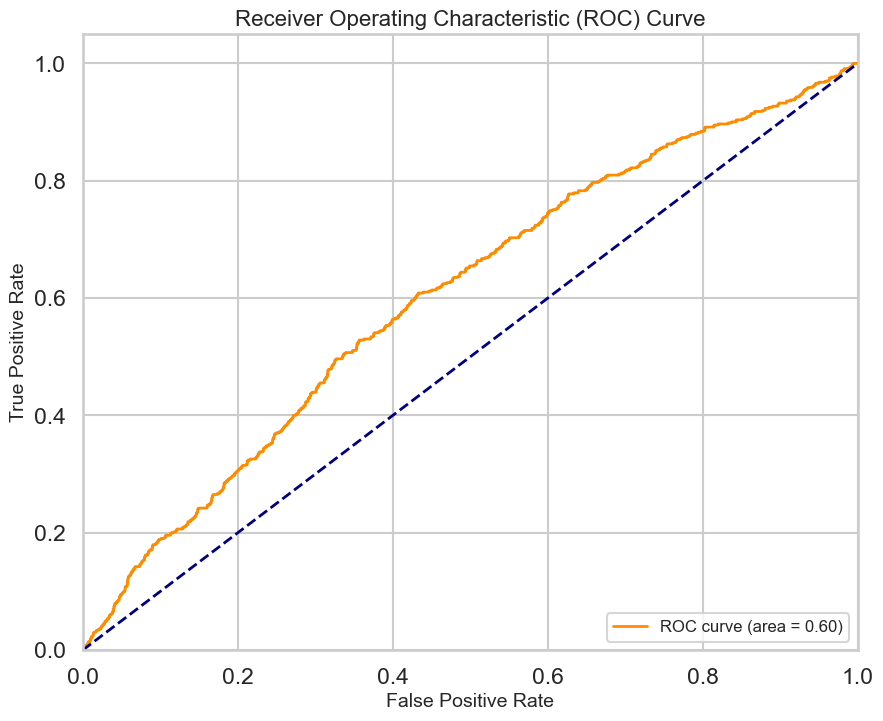

In [11]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the development set
y_dev_prob = model.predict_proba(X_dev_processed)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_dev, y_dev_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid", context="talk")

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()


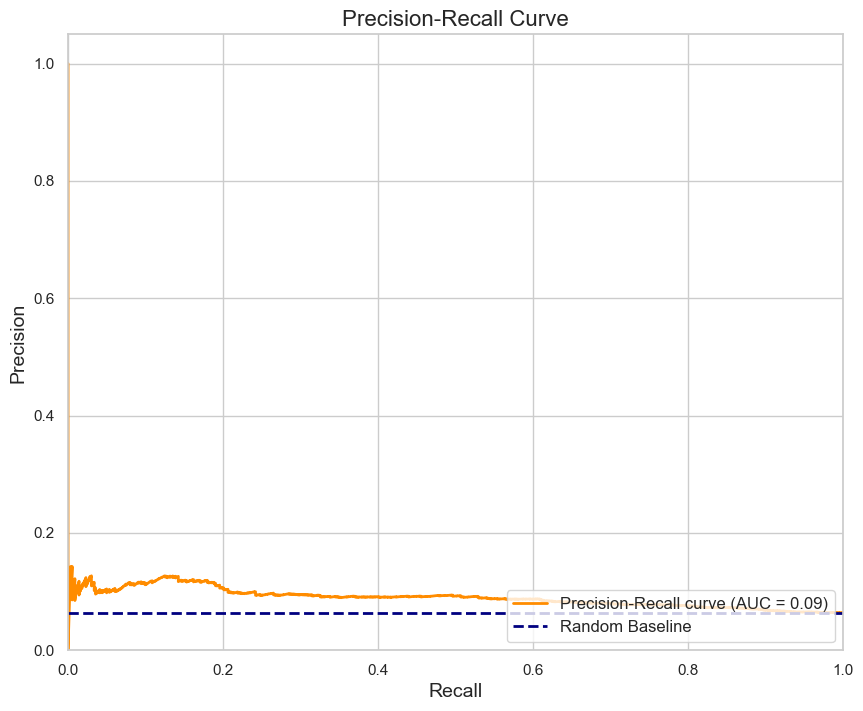

In [14]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get probabilities for positive class
y_dev_prob = model.predict_proba(X_dev_processed)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_dev, y_dev_prob)
pr_auc = auc(recall, precision)

# Create plot
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Plot precision-recall curve
plt.plot(recall, precision, color='darkorange', lw=2, 
         label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')

# Add baseline for random classifier
plt.plot([0, 1], [np.mean(y_dev), np.mean(y_dev)], color='navy', 
         lw=2, linestyle='--', label='Random Baseline')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

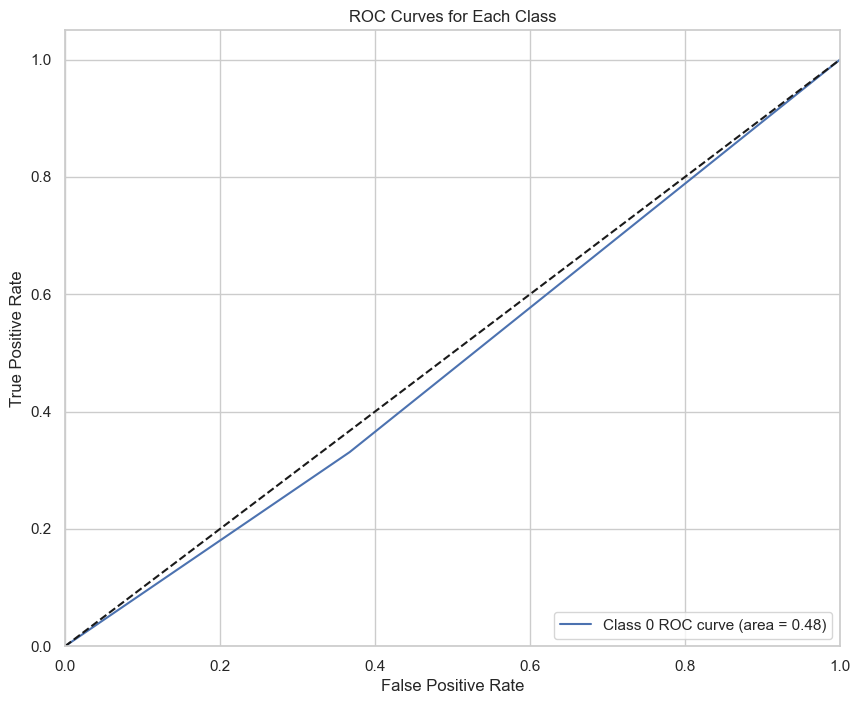

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test contains the true labels and y_pred contains the predicted probabilities
# If y_pred contains only binary predictions, ensure to use the probabilities instead

# Binarize the labels for ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc='lower right')
plt.show()

## **6. Addressing Class Imbalance**

- **Resampling Techniques**
    - **Oversampling**
        - Apply SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples of the minority class.
    - **Undersampling**
        - Randomly remove samples from the majority class.
    - **Hybrid Methods**
        - Combine oversampling and undersampling for balanced datasets.
- **Algorithmic Approaches**
    - **Use Models with Built-in Handling**
        - Tree-based methods like Random Forests and XGBoost.
    - **Class Weighting**
        - Adjust class weights in algorithms like Logistic Regression and SVM to penalize misclassification of the minority class.

In [26]:
import pandas as pd
import numpy as np

# Check data types of all columns
print("Data Types in X_train_processed:")
print(X_train_processed.dtypes)

# Identify non-numeric columns, if any
non_numeric_cols = X_train_processed.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNon-numeric Columns:", non_numeric_cols)


Data Types in X_train_processed:
num__subscription_length                     float64
num__vehicle_age                             float64
num__customer_age                            float64
num__region_density                          float64
num__airbags                                 float64
                                              ...   
cat__is_power_steering_Yes                   float64
cat__is_driver_seat_height_adjustable_Yes    float64
cat__is_day_night_rear_view_mirror_Yes       float64
cat__is_ecw_Yes                              float64
cat__is_speed_alert_Yes                      float64
Length: 97, dtype: object

Non-numeric Columns: []


In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_train_processed, y_train)
# print the counts of each class
print(y_balanced.value_counts())

# 1. Adjust class weights more aggressively
# class_weights = {0: 1, 1: 30}  # Increase weight for minority class

# 2. Use better evaluation metric
model = CatBoostClassifier(
    iterations=1000,
    eval_metric='F1',
    class_weights=class_weights,
    learning_rate=0.1,
    depth=6
)
# Define the parameter grid
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8],
    'class_weights': [{0: 1, 1: 30}, {0: 1, 1: 50}]
}

# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier(eval_metric='F1', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, scoring='f1_weighted', cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_processed, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate the best model on the development set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_dev_processed)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_dev, y_pred)

# Calculate F1 score
f1 = f1_score(y_dev, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_dev, y_pred, target_names=['No Claim', 'Claim']))

claim_status
0               38390
1               38390
Name: count, dtype: int64
Fitting 3 folds for each of 24 candidates, totalling 72 fits
0:	learn: 0.8039346	total: 59ms	remaining: 29.4s
0:	learn: 0.8040247	total: 64.4ms	remaining: 32.1s
0:	learn: 0.8039346	total: 62.5ms	remaining: 31.2s
0:	learn: 0.8039654	total: 68.9ms	remaining: 34.4s
0:	learn: 0.8039346	total: 70.9ms	remaining: 1m 10s
0:	learn: 0.8040247	total: 71.7ms	remaining: 1m 11s
1:	learn: 0.8047230	total: 78.2ms	remaining: 19.5s
0:	learn: 0.8039654	total: 75.3ms	remaining: 37.6s
0:	learn: 0.8040247	total: 77.9ms	remaining: 38.9s
1:	learn: 0.8040247	total: 87.9ms	remaining: 21.9s
1:	learn: 0.8040247	total: 80.7ms	remaining: 40.3s
1:	learn: 0.8039346	total: 86.3ms	remaining: 43s
1:	learn: 0.8039531	total: 84.7ms	remaining: 21.1s
2:	learn: 0.8040863	total: 97.3ms	remaining: 16.1s
1:	learn: 0.8040247	total: 88.5ms	remaining: 22s
2:	learn: 0.8047230	total: 96.2ms	remaining: 15.9s
1:	learn: 0.8039531	total: 95.1ms	remaining:

In [1]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Predict probabilities for the development set
y_dev_prob = best_model.predict_proba(X_dev_processed)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_dev, y_dev_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

NameError: name 'best_model' is not defined

In [31]:
# describe X_train
X_train_processed.describe()

# counts as absolute values intgers
X_train_processed.abs().astype(int)

num__subscription_length  num__vehicle_age  num__customer_age  \
0                             1                 0                  0   
1                             0                 0                  2   
2                             0                 1                  0   
3                             0                 1                  0   
4                             1                 0                  0   
...                         ...               ...                ...   
41009                         1                 0                  0   
41010                         0                 0                  0   
41011                         1                 0                  1   
41012                         1                 0                  1   
41013                         0                 0                  0   

       num__region_density  num__airbags  num__displacement  num__cylinder  \
0                        0             0                  0              0   
1                        0             0                  0              0   
2                        0             0                  0              1   
3                        0             0                  1              1   
4                        0             0                  0              0   
...                    ...           ...                ...            ...   
41009                    0             1                  0              0   
41010                    0             0                  1              1   
41011                    0             0                  0              0   
41012                    0             0                  1              0   
41013                    0             0                  1              1   

       num__turning_radius  num__length  num__width  ...  \
0                        0            0           0  ...   
1                        0            0           0  ...   
2                        0            0           0  ...   
3                        1            1           1  ...   
4                        0            0           0  ...   
...                    ...          ...         ...  ...   
41009                    0            0           0  ...   
41010                    1            1           1  ...   
41011                    0            0           0  ...   
41012                    0            0           0  ...   
41013                    1            1           1  ...   

       cat__is_rear_window_washer_Yes  cat__is_rear_window_defogger_Yes  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   
...                               ...                               ...   
41009                               1                                 1   
41010                               0                                 0   
41011                               0                                 0   
41012                               0                                 1   
41013                               0                                 0   

       cat__is_brake_assist_Yes  cat__is_power_door_locks_Yes  \
0                             1                             1   
1                             1                             1   
2                             0                             1   
3                             0                             0   
4                             1                             1   
...                         ...                           ...   
41009                         1                             1   
41010                         0                             0  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, classification_report

# Define the neural network architecture
class InsuranceNet(nn.Module):
    def __init__(self, input_size):
        super(InsuranceNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)  # Output logits
        return x

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_processed.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_dev_tensor = torch.tensor(X_dev_processed.values, dtype=torch.float32)
y_dev_tensor = torch.tensor(y_dev.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
dev_dataset = TensorDataset(X_dev_tensor, y_dev_tensor)
dev_loader = DataLoader(dev_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train_processed.shape[1]
model = InsuranceNet(input_size).to(device)

# Calculate class counts
class_counts = y_train.value_counts()
num_negatives = class_counts[0]
num_positives = class_counts[1]

# Calculate pos_weight for BCEWithLogitsLoss
pos_weight = num_negatives / num_positives
pos_weight = torch.tensor(pos_weight, dtype=torch.float32).to(device)

# Use weighted BCE loss
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Optionally, evaluate on the validation set each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Evaluate the model on the validation set
model.eval()
with torch.no_grad():
    y_pred = []
    for inputs, _ in dev_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probabilities = torch.sigmoid(outputs)
        y_pred.extend(probabilities.cpu().numpy())

# Threshold probabilities at 0.5 (or adjust as needed)
threshold = 0.5
y_pred = [1 if x >= threshold else 0 for x in y_pred]

# Calculate F1 score
f1 = f1_score(y_dev, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_dev, y_pred, target_names=['No Claim', 'Claim']))


Epoch 1/50, Loss: 1.2912189961409606
Epoch 2/50, Loss: 1.2692223785448
Epoch 3/50, Loss: 1.2631922506504982
Epoch 4/50, Loss: 1.2615389677924038
Epoch 5/50, Loss: 1.2598877778849251
Epoch 6/50, Loss: 1.2567956457829885
Epoch 7/50, Loss: 1.255597310951459
Epoch 8/50, Loss: 1.2531017021344344
Epoch 9/50, Loss: 1.2507075480477485
Epoch 10/50, Loss: 1.2505406705712008
Epoch 11/50, Loss: 1.248527687443958
Epoch 12/50, Loss: 1.2461767189216317
Epoch 13/50, Loss: 1.2457868718133889
Epoch 14/50, Loss: 1.2428341626005128
Epoch 15/50, Loss: 1.2428443124067392
Epoch 16/50, Loss: 1.2403497410452868
Epoch 17/50, Loss: 1.238631749859838
Epoch 18/50, Loss: 1.2380673202821133
Epoch 19/50, Loss: 1.236572930388815
Epoch 20/50, Loss: 1.2344366612374875
Epoch 21/50, Loss: 1.2329269158486829
Epoch 22/50, Loss: 1.2318733148567391
Epoch 23/50, Loss: 1.2305691138072616
Epoch 24/50, Loss: 1.2275522293613035
Epoch 25/50, Loss: 1.2268971667832778
Epoch 26/50, Loss: 1.2252779091576147
Epoch 27/50, Loss: 1.2232473

In [37]:
X_train_processed

num__subscription_length  num__vehicle_age  num__customer_age  \
0                     -1.183796          0.537878           0.456582   
1                      0.288398          0.361852           2.763428   
2                      0.795219         -1.222388          -0.264307   
3                     -0.435632         -1.046362           0.456582   
4                      1.036562         -0.694308           0.168226   
...                         ...               ...                ...   
41009                  1.229637         -0.518282           0.456582   
41010                  0.312532         -0.870335          -0.841019   
41011                  1.350309          0.185825          -1.129374   
41012                 -1.256199         -0.518282           1.033293   
41013                 -0.532169          0.537878          -0.120129   

       num__region_density  num__airbags  num__displacement  num__cylinder  \
0                -0.061560     -0.617553           0.133995       0.774546   
1                 0.896079     -0.617553           0.133995       0.774546   
2                 0.500447     -0.617553          -0.610069      -1.291078   
3                 0.899076     -0.617553          -1.372923      -1.291078   
4                -0.571086     -0.617553           0.133995       0.774546   
...                    ...           ...                ...            ...   
41009             0.500447      1.569599           0.133995       0.774546   
41010            -0.122126     -0.617553          -1.372923      -1.291078   
41011            -0.571086     -0.617553           0.133995       0.774546   
41012            -0.722757     -0.617553           1.265124       0.774546   
41013             0.896079     -0.617553          -1.372923      -1.291078   

       num__turning_radius  num__length  num__width  ...  \
0                -0.229854    -0.013848    0.563236  ...   
1                -0.229854    -0.013848    0.563236  ...   
2                 0.648078    -0.380239   -0.828766  ...   
3                -1.107785    -1.299430   -1.399844  ...   
4                -0.229854    -0.013848    0.563236  ...   
...                    ...          ...         ...  ...   
41009            -0.010371     0.452176    0.652467  ...   
41010            -1.107785    -1.299430   -1.399844  ...   
41011            -0.229854    -0.013848    0.563236  ...   
41012             0.209112     0.468245    0.206313  ...   
41013            -1.107785    -1.299430   -1.399844  ...   

       cat__is_rear_window_washer_Yes  cat__is_rear_window_defogger_Yes  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 0.0                               0.0   
4                                 0.0                               0.0   
...                               ...                               ...   
41009                             1.0                               1.0   
41010                             0.0                               0.0   
41011                             0.0                               0.0   
41012                             0.0                               1.0   
41013                             0.0                               0.0   

       cat__is_brake_assist_Yes  cat__is_power_door_locks_Yes  \
0                           1.0                           1.0   
1                           1.0                           1.0   
2                           0.0                           1.0   
3                           0.0                           0.0   
4                           1.0                           1.0   
...                         ...                           ...   
41009                       1.0                           1.0   
41010                       0.0                           0.0  